
# Trabajo práctico integrador
# Análisis de datos 

## Authors:
- Karen Raczkowski
- Juan Iribet
- FS


### 1. Introducción y motivación Les proponemos para este trabajo final realizar el análisis completo para un set de datos, para ello les vamos a proponer varios de estos y la idea es que ustedes elijan uno. Para dar un poco de noción sobre a qué corresponden estos datos, también vamos a presentar a que tipo de problema/etapa del análisis de datos corresponden

In [5]:
# Importamos librerías 
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Evaluación de modelos de prueba
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

# Partición de train-test set
from sklearn.model_selection import train_test_split

# Pipelines
from sklearn.pipeline import Pipeline

# Crear datasets
from sklearn.datasets import make_regression

# Esquemas de entrenamiento
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold


# LEGO Database

- Preguntas interesantes para considerar aquí:
    - ¿Cómo evolucionaron los sets de lego en tamaño a través de los años?
    - ¿Existe alguna asociación entre los colores y las temáticas?
    - ¿Podría predecir a que temática pertenece un set basado en el contenido de este? (recomendado)
    - A través de los años, ¿Cuál o cuáles son los sets que tienen las piezas más raras?

![Data set Schema](https://rebrickable.com/static/img/diagrams/downloads_schema_v3.png)

In [6]:
url_themes = 'https://cdn.rebrickable.com/media/downloads/themes.csv.gz'
url_colors = 'https://cdn.rebrickable.com/media/downloads/colors.csv.gz'
url_part_categories = 'https://cdn.rebrickable.com/media/downloads/part_categories.csv.gz'
url_parts = 'https://cdn.rebrickable.com/media/downloads/parts.csv.gz'
url_part_relationships = 'https://cdn.rebrickable.com/media/downloads/part_relationships.csv.gz'
url_elements = 'https://cdn.rebrickable.com/media/downloads/elements.csv.gz'
url_sets ='https://cdn.rebrickable.com/media/downloads/sets.csv.gz'
url_minifigs = 'https://cdn.rebrickable.com/media/downloads/minifigs.csv.gz'
url_inventories = 'https://cdn.rebrickable.com/media/downloads/inventories.csv.gz'
url_inventory_parts = 'https://cdn.rebrickable.com/media/downloads/inventory_parts.csv.gz'
url_inventory_sets = 'https://cdn.rebrickable.com/media/downloads/inventory_sets.csv.gz'
url_inventory_minifigs = 'https://cdn.rebrickable.com/media/downloads/inventory_minifigs.csv.gz'

In [7]:
themes = pd.read_csv(url_themes, delimiter=',') #(3.9 KB)
colors = pd.read_csv(url_colors, delimiter=',') #(2.5 KB)
part_categories = pd.read_csv(url_part_categories, delimiter=',') #(725 bytes)
parts = pd.read_csv(url_parts, delimiter=',') #(839.0 KB)
part_relationships = pd.read_csv(url_part_relationships, delimiter=',') #(149.0 KB)
elements = pd.read_csv(url_elements, delimiter=',') #(586.8 KB)
sets = pd.read_csv(url_sets, delimiter=',') #(379.9 KB)
minifigs = pd.read_csv(url_minifigs, delimiter=',') #(223.2 KB)
inventories = pd.read_csv(url_inventories, delimiter=',') #(194.1 KB)
inventory_parts = pd.read_csv(url_inventory_parts, delimiter=',') #(9.9 MB)
inventory_sets = pd.read_csv(url_inventory_sets, delimiter=',') #(14.1 KB)
inventory_minifigs = pd.read_csv(url_inventory_minifigs, delimiter=',') #(76.2 KB)

In [8]:
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0


In [9]:
colors.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [10]:
part_categories.head()

,id,name
0,1,Baseplates
1,3,Bricks Sloped
2,4,"Duplo, Quatro and Primo"
3,5,Bricks Special
4,6,Bricks Wedged


In [11]:
parts.head()

,part_num,name,part_cat_id,part_material
0,003381,Sticker Sheet for Set 663-1,58,Plastic
1,003383,"Sticker Sheet for Sets 618-1, 628-2",58,Plastic
2,003402,"Sticker Sheet for Sets 310-3, 311-1, 312-3",58,Plastic
3,003429,Sticker Sheet for Set 1550-1,58,Plastic
4,003432,"Sticker Sheet for Sets 357-1, 355-1, 940-1",58,Plastic


In [12]:
part_relationships.head()

,rel_type,child_part_num,parent_part_num
0,P,3626cpr3662,3626c
1,P,87079pr9974,87079
2,P,3960pr9971,3960
3,R,98653pr0003,98086pr0003
4,R,98653pr0003,98088pat0003


In [13]:
elements.head()

,element_id,part_num,color_id
0,6300211,67906c01,14
1,4566309,2564,0
2,4275423,53657,1004
3,6194308,92926,71
4,6229123,26561,4


In [14]:
sets.head()

,set_num,name,year,theme_id,num_parts,img_url
0,001-1,Gears,1965,1,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
1,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
3,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg
4,0013-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0013-1.jpg


In [15]:
minifigs.head()

,fig_num,name,num_parts,img_url
0,fig-000001,Toy Store Employee,4,https://cdn.rebrickable.com/media/sets/fig-000...
1,fig-000002,Customer Kid,4,https://cdn.rebrickable.com/media/sets/fig-000...
2,fig-000003,"Assassin Droid, White",8,https://cdn.rebrickable.com/media/sets/fig-000...
3,fig-000004,"Man, White Torso, Black Legs, Brown Hair",4,https://cdn.rebrickable.com/media/sets/fig-000...
4,fig-000005,Captain America with Short Legs,3,https://cdn.rebrickable.com/media/sets/fig-000...


In [16]:
inventories.head()

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [17]:
inventory_parts.head()

,inventory_id,part_num,color_id,quantity,is_spare,img_url
0,1,48379c01,72,1,f,https://cdn.rebrickable.com/media/parts/photos...
1,1,48395,7,1,f,https://cdn.rebrickable.com/media/parts/photos...
2,1,stickerupn0077,9999,1,f,NaN
3,1,upn0342,0,1,f,NaN
4,1,upn0350,25,1,f,NaN


In [18]:
inventory_sets.head()

,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1


In [19]:
inventory_minifigs.head()

,inventory_id,fig_num,quantity
0,3,fig-001549,1
1,4,fig-000764,1
2,19,fig-000555,1
3,25,fig-000574,1
4,26,fig-000842,1


## ¿Cómo evolucionaron los sets de lego en tamaño a través de los años?

In [20]:
year = sets['year'].sort_values().unique()

#Calculate the 'num_parts' mean of each year 
sets_mean_size_year = np.array(sets[['year','num_parts']].groupby(by='year').mean())[:,0].round(0)

In [21]:
sets_size_evolution = pd.DataFrame(sets_mean_size_year, year, columns=['sets_mean_size'])
sets_size_evolution

,sets_mean_size
1949,100.0
1950,1.0
1953,12.0
1954,8.0
1955,12.0
...,...
2019,192.0
2020,210.0
2021,233.0
2022,289.0


In [22]:
sets_size_evolution.describe().round(0)

,sets_mean_size
count,73.0
mean,114.0
std,58.0
min,1.0
25%,81.0
50%,106.0
75%,151.0
max,289.0


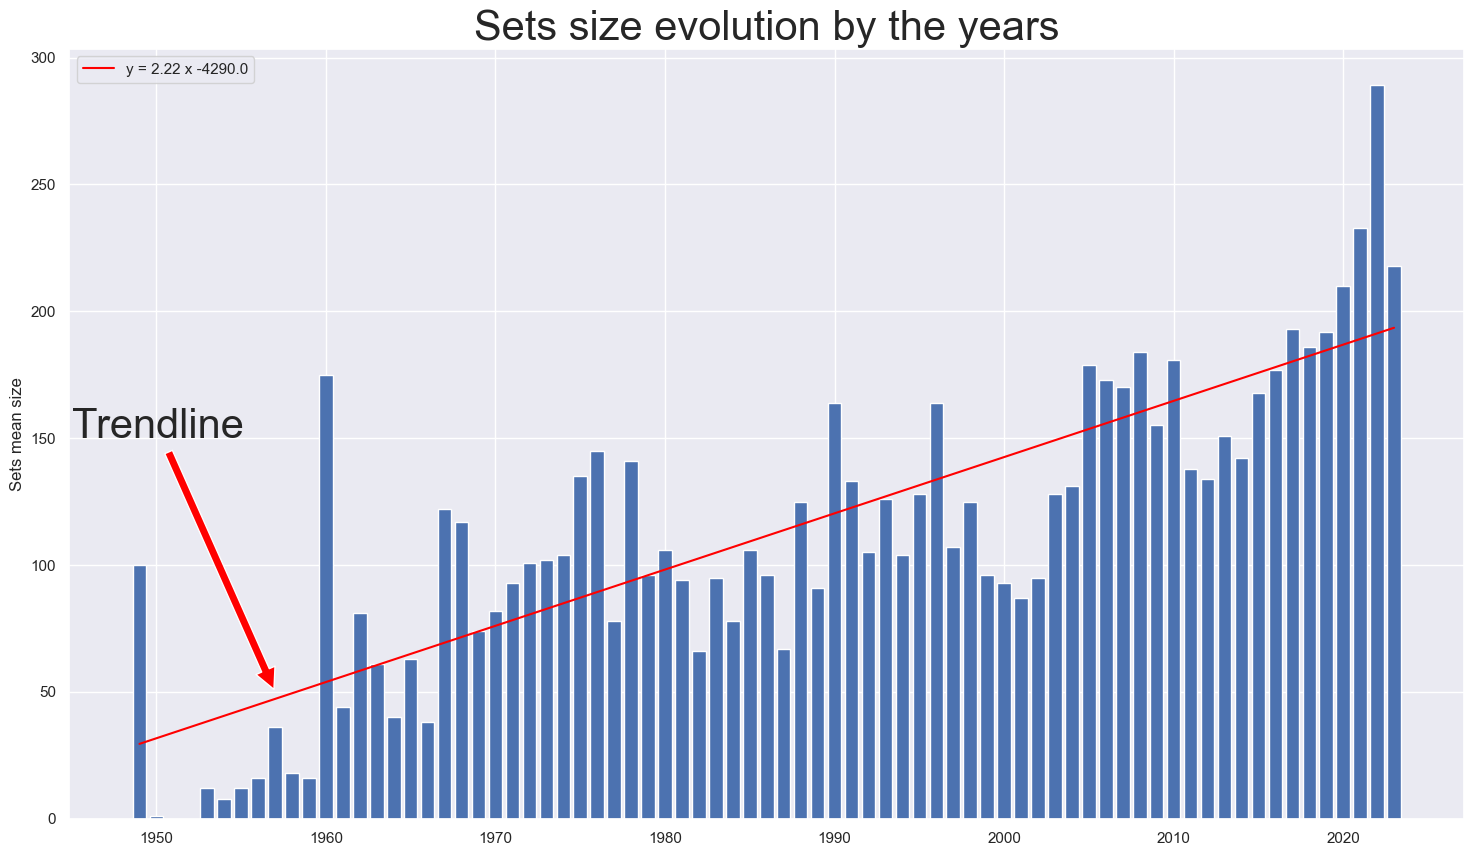

In [23]:
z = np.polyfit(year, sets_mean_size_year, 1)
p = np.poly1d(z)

fig, ax = plt.subplots(figsize=(18,10))
ax.bar(year, sets_mean_size_year)
ax.set_ylabel('Sets mean size')
ax.plot(year, p(year), c='red', label = f'y = {p.c.round(2)[0]} x {p.c.round(0)[1]}')
ax.set_title('Sets size evolution by the years',fontsize=30)
ax.annotate('Trendline',(1957,50), xytext=(1945,150), fontsize=30, arrowprops=dict(arrowstyle='simple', facecolor='red'))
ax.legend(loc='upper left')
plt.show()